# "Data Science & Business Analytics Internship" - The Spark Foundation

Batch: March23

# Sidra Tul Muntaha

## Task 01: Predict the percentage of a student based on the number of study hours.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,f1_score

### Loading Dataset

In [2]:
dataset = 'https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv'
df = pd.read_csv(dataset)

### Understanding Dataset

In [3]:
df.shape

(25, 2)

In [4]:
pd.set_option('display.max_columns',None)

In [5]:
df.head(25).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
Hours,2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8
Scores,21.0,47.0,27.0,75.0,30.0,20.0,88.0,60.0,81.0,25.0,85.0,62.0,41.0,42.0,17.0,95.0,30.0,24.0,67.0,69.0,30.0,54.0,35.0,76.0,86.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Data Visualization

Text(0.5, 1.0, 'Study Hours Vs Score')

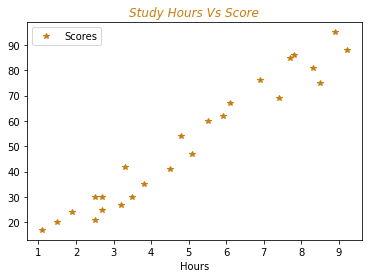

In [8]:
df.plot(x='Hours', y= 'Scores', style='*',color='#c77e11')
plt.title('Study Hours Vs Score',color ='#c77e11',style='italic')

### Data Preparation

In [9]:
X = df.iloc[:, :-1].values  
y = df.iloc[:, 1].values  

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                test_size = 0.5,random_state=0)

### Linear Regression Model Fitting & Making Predictions

In [11]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [12]:
y_pred = model.predict(X_test)
result = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [13]:
result

,Actual,Predicted
0,20,14.973540
1,27,31.811747
2,69,73.412023
3,30,24.878368
4,62,58.554782
5,35,37.754644
6,24,18.935471
7,86,77.373954
8,76,68.459609
9,17,11.011609


### Model Parameters

In [14]:
print(f'Value of Coefficient: {model.coef_}\nValue of Intercept: {model.intercept_:.2f}\nEquation of Regression Line: {model.coef_}*x+{model.intercept_:.2f}')

Value of Coefficient: [9.90482759]
Value of Intercept: 0.12
Equation of Regression Line: [9.90482759]*x+0.12


### Result Visualization

<AxesSubplot:>

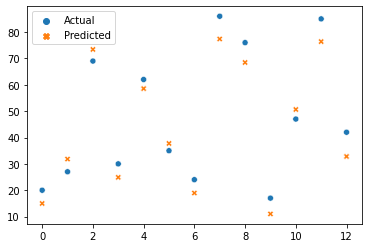

In [15]:
sns.scatterplot(data=result)

### Regression Line & Data Points Visualization

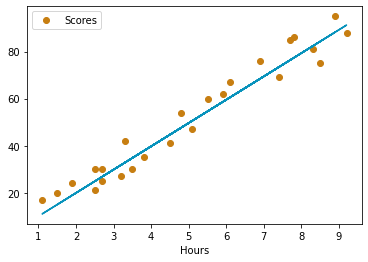

In [16]:
line = model.coef_*X+model.intercept_
df.plot(x='Hours', y= 'Scores', style='o',color='#c77e11')
plt.plot(X, line,color='#0893bc');

plt.show()

### Model Evaluation

In [17]:
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

print(f'Mean Absolute Error: {mae:.2f}\nMean Square Error: {mse:.2f}\nR2 Score: {r2:.2f}')

Mean Absolute Error: 5.71
Mean Square Error: 36.80
R2 Score: 0.94
